### Amazon Alexa Sentimental Analysis

### Name : Shruti S. Mahapurkar


    

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import stat
import string

In [2]:
tsv_file='amazon_alexa.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('Alexa.csv',index=False)

In [3]:
 data = pd.read_csv("Alexa.csv")

data 

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [5]:
data.tail(10)

,rating,date,variation,verified_reviews,feedback
3140,4,30-Jul-18,White Dot,Barry,1
3141,3,30-Jul-18,Black Dot,,1
3142,4,30-Jul-18,White Dot,My three year old loves it. Good for doing ba...,1
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### EDA 

In [8]:
data.shape

(3150, 5)

In [9]:
print(f"Features : {data.columns.values}")

Features : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [10]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [11]:
data.duplicated().sum()

715

In [12]:
print(data['rating'].value_counts())

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64


In [13]:
print(data['variation'].value_counts())

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


In [14]:
data[data['verified_reviews'].isna()== True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [15]:
data.dropna(inplace=True)

In [16]:

data.shape

(3149, 5)

In [17]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [18]:

data['length'] = data['verified_reviews'].apply(len)

In [19]:
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [20]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [21]:
summary_statistics = data['rating'].describe()
print("summary statistics" ,summary_statistics)

summary statistics count    3149.000000
mean        4.463957
std         1.067773
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [24]:
import re

In [25]:
def remove_special(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

data['verified_reviews'] = data['verified_reviews'].apply(remove_special)

In [26]:
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My yr...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,Perfect for kids adults and everyone in between,1,50
3146,5,30-Jul-18,Black Dot,Listening to music searching locations checkin...,1,135
3147,5,30-Jul-18,Black Dot,I do love these things i have them running my ...,1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [27]:
#data['verified_reviews'] = data['verified_reviews'].fillna('')
data['verified_reviews'] = data['verified_reviews'].astype(str)

In [28]:
words=[]
words = data['verified_reviews'].apply(word_tokenize)

print(words)

0                                        [Love, my, Echo]
1                                             [Loved, it]
2       [Sometimes, while, playing, a, game, you, can,...
3       [I, have, had, a, lot, of, fun, with, this, th...
4                                                 [Music]
                              ...                        
3145    [Perfect, for, kids, adults, and, everyone, in...
3146    [Listening, to, music, searching, locations, c...
3147    [I, do, love, these, things, i, have, them, ru...
3148    [Only, complaint, I, have, is, that, the, soun...
3149                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object


In [29]:
sentences=[]
sentences = data['verified_reviews'].apply(sent_tokenize)

print(sentences)

0                                          [Love my Echo]
1                                              [Loved it]
2       [Sometimes while playing a game you can answer...
3       [I have had a lot of fun with this thing My  y...
4                                                 [Music]
                              ...                        
3145    [Perfect for kids adults and everyone in between]
3146    [Listening to music searching locations checki...
3147    [I do love these things i have them running my...
3148    [Only complaint I have is that the sound quali...
3149                                               [Good]
Name: verified_reviews, Length: 3149, dtype: object


In [30]:
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My yr...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,Perfect for kids adults and everyone in between,1,50
3146,5,30-Jul-18,Black Dot,Listening to music searching locations checkin...,1,135
3147,5,30-Jul-18,Black Dot,I do love these things i have them running my ...,1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [31]:
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words('english'))
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
def remove_stopwords(text):
    words = word_tokenize(text.lower())
    filtered_text = [word for word in words if word not in stop_words]
    return ' '.join(filtered_text)

data['verified_reviews'] = data['verified_reviews'].apply(remove_stopwords)

In [34]:
data

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,love echo,1,13
1,5,31-Jul-18,Charcoal Fabric,loved,1,9
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,195
3,5,31-Jul-18,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...,1,172
4,5,31-Jul-18,Charcoal Fabric,music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect kids adults everyone,1,50
3146,5,30-Jul-18,Black Dot,listening music searching locations checking t...,1,135
3147,5,30-Jul-18,Black Dot,love things running entire home tv lights ther...,1,441
3148,5,30-Jul-18,White Dot,complaint sound quality isnt great mostly use ...,1,380


In [35]:
from nltk.stem import PorterStemmer
pt = PorterStemmer()

In [36]:
def stem_text(text):
    words = word_tokenize(text.lower())
    stemmed_words = [pt.stem(word) for word in words]
    return stemmed_words

In [37]:
data['stemmed_reviews'] = data['verified_reviews'].apply(stem_text)

In [38]:
data['stemmed_reviews'] 

0                                            [love, echo]
1                                                  [love]
2       [sometim, play, game, answer, question, correc...
3       [lot, fun, thing, yr, old, learn, dinosaur, co...
4                                                 [music]
                              ...                        
3145                       [perfect, kid, adult, everyon]
3146    [listen, music, search, locat, check, time, lo...
3147    [love, thing, run, entir, home, tv, light, the...
3148    [complaint, sound, qualiti, isnt, great, mostl...
3149                                               [good]
Name: stemmed_reviews, Length: 3149, dtype: object

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahap\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
lm=WordNetLemmatizer()

In [42]:
def lemmatize_text(text):
    words = word_tokenize(text.lower())
    lemmatized_words = [lm.lemmatize(word) for word in words]
    return lemmatized_words

In [43]:
data['lemmatized_reviews'] = data['verified_reviews'].apply(lemmatize_text)

In [44]:
data['lemmatized_reviews']

0                                            [love, echo]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, yr, old, learns, dinosaur, c...
4                                                 [music]
                              ...                        
3145                      [perfect, kid, adult, everyone]
3146    [listening, music, searching, location, checki...
3147    [love, thing, running, entire, home, tv, light...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [good]
Name: lemmatized_reviews, Length: 3149, dtype: object

### rating distribution

In [45]:
rating_dist = data['rating'].value_counts().sort_index()

Text(0, 0.5, 'frequency')

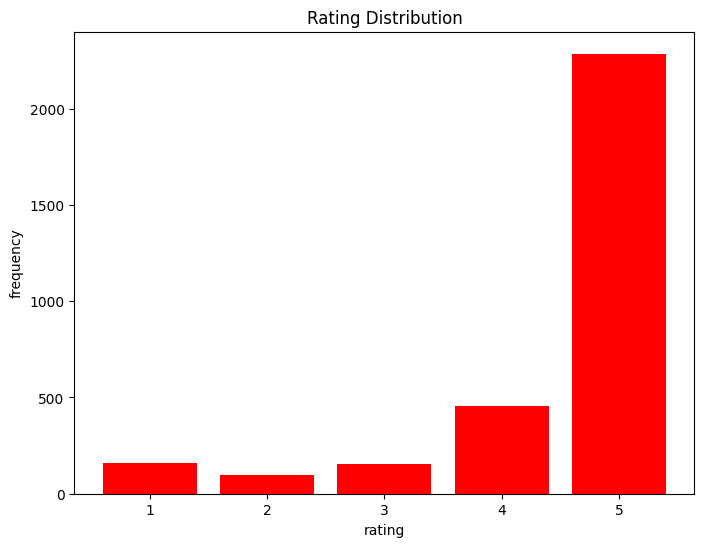

In [46]:
plt.figure(figsize=(8,6))
plt.bar(rating_dist.index,rating_dist.values,color='red')
plt.title("Rating Distribution")
plt.xlabel('rating')
plt.ylabel('frequency')


In [47]:
percentage = (data['rating'].value_counts(normalize=True) * 100).round(2)

print(percentage)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: proportion, dtype: float64


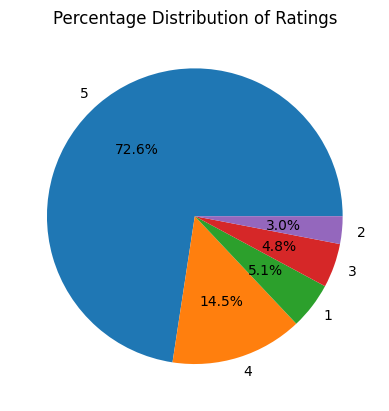

In [48]:
plt.pie(percentage, labels=percentage.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Ratings')
plt.show()

### feedback distribution

In [49]:
feedback_distribution = data['feedback'].value_counts()
feedback_distribution 

feedback
1    2893
0     256
Name: count, dtype: int64

In [50]:
positive_r = data[data['feedback'] == 1]['feedback'].count()
positive_r


2893

In [51]:
negative_r = data[data['feedback'] == 0]['feedback'].count()
negative_r

256

In [52]:
total = len(data)

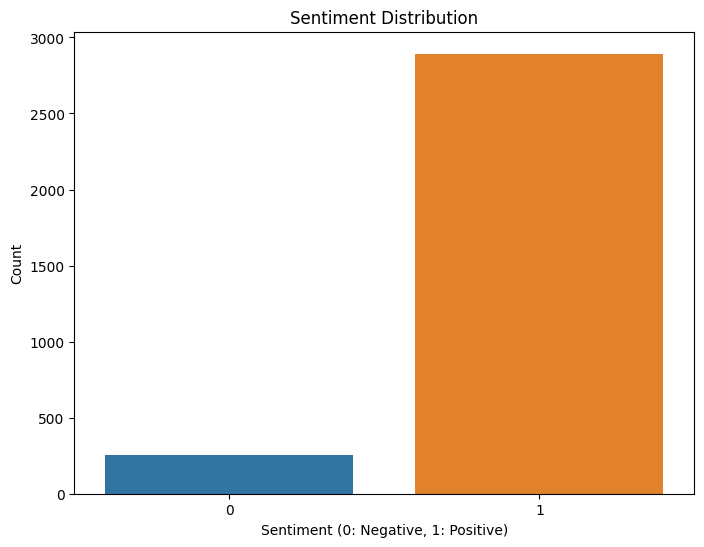

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='feedback', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [54]:
positive_percent = (positive_r / total)*100
positive_percent 


91.87043505874881

In [55]:
negative_percent = (negative_r / total)*100
negative_percent

8.129564941251191

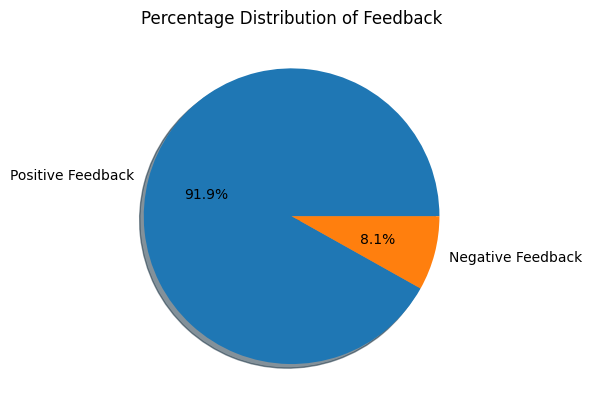

In [56]:
labels = ['Positive Feedback', 'Negative Feedback']
sizes = [positive_percent, negative_percent]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True)
plt.title('Percentage Distribution of Feedback')
plt.show()

### variation 

In [57]:
print(data['variation'].value_counts())

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


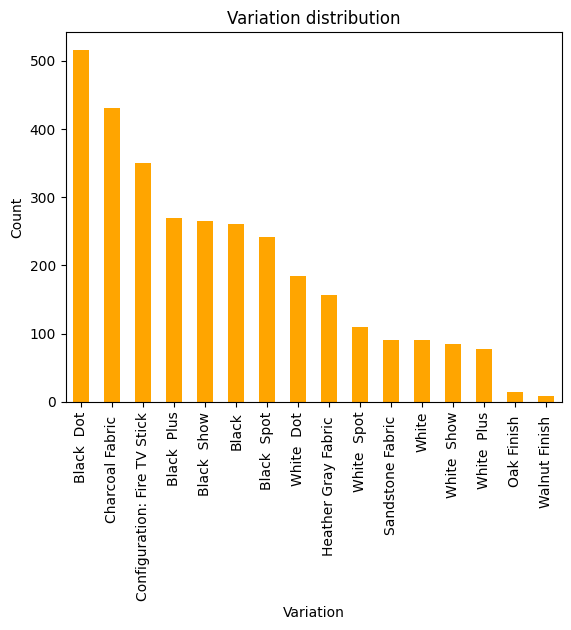

In [58]:
data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [59]:
variation_dist = (data['variation'].value_counts(normalize=True) * 100).round(2)
print(variation_dist)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: proportion, dtype: float64


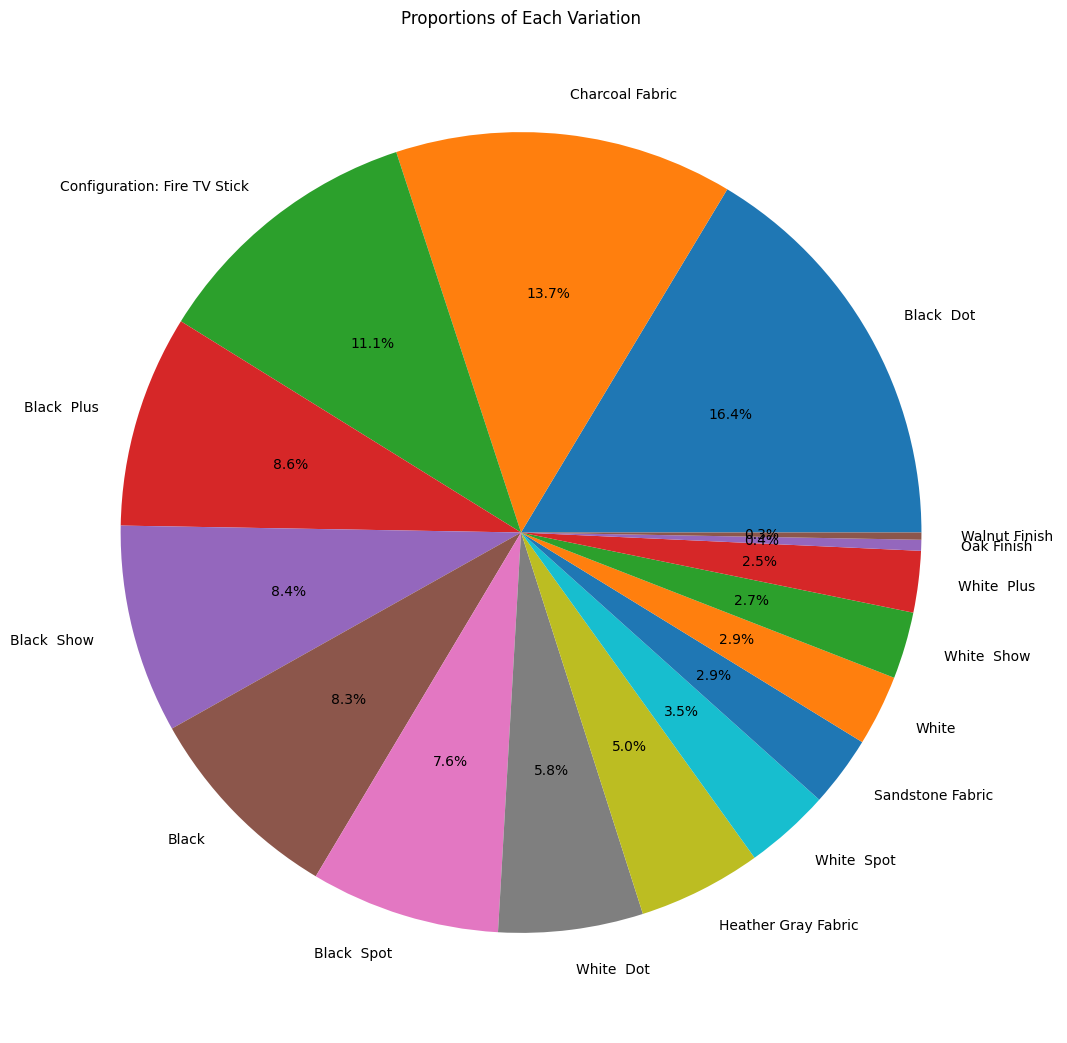

In [60]:
variations = variation_dist.index
proportions = variation_dist.values

# Explode the slices to visually separate them
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 )  # Explode the first slice

# Create pie chart
plt.figure(figsize=(13,13))
plt.pie(proportions, labels=variations, autopct='%1.1f%%', explode=explode)
plt.title('Proportions of Each Variation')
plt.show()

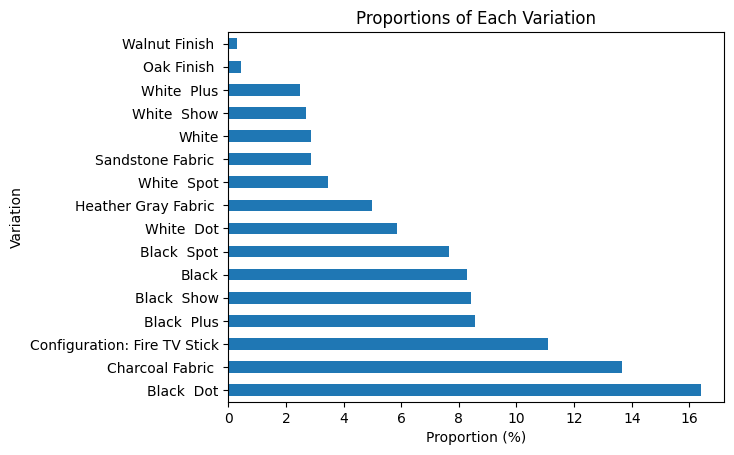

In [61]:
variation_dist.plot(kind='barh')
plt.title('Proportions of Each Variation')
plt.ylabel('Variation')
plt.xlabel('Proportion (%)')
plt.show()

### worldcloud

In [62]:
from wordcloud import WordCloud

In [63]:
reviews = " ".join([review for review in data['verified_reviews']])
                        
wc = WordCloud(background_color='black', max_words=80)


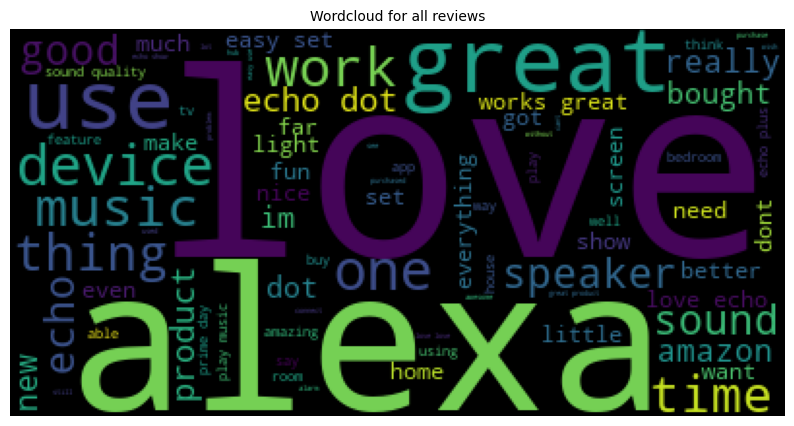

In [64]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [65]:
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

In [66]:
pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

In [67]:
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

In [68]:
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

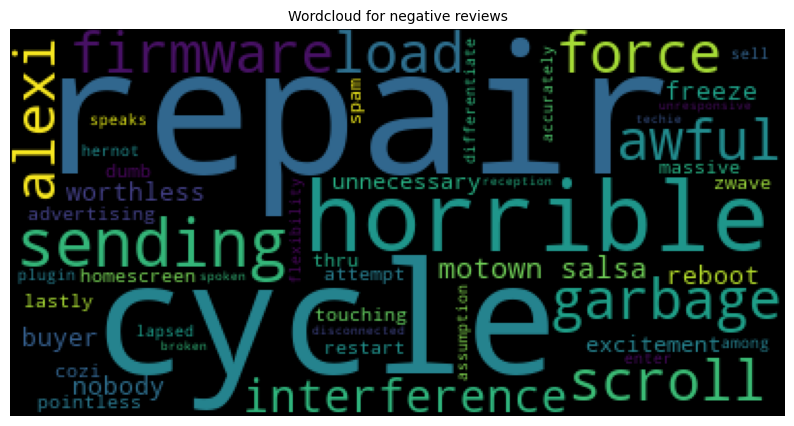

In [69]:

wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

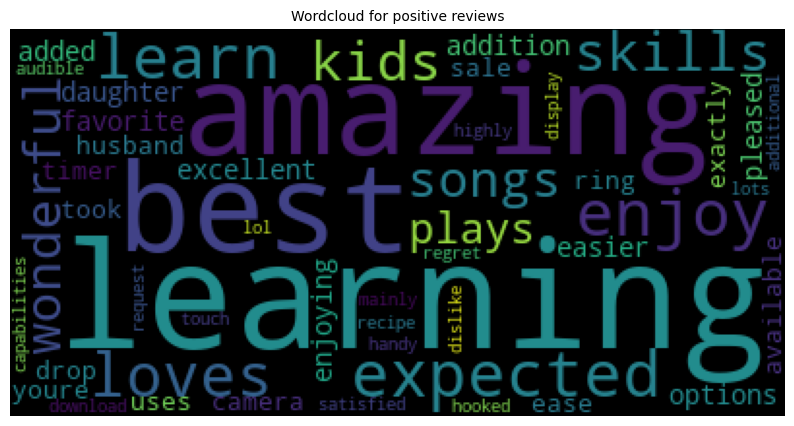

In [70]:
wc = WordCloud(background_color='black', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()


### modelling

### Decisiontree

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [72]:
tfidf_vectorizer = TfidfVectorizer()

In [73]:
X = tfidf_vectorizer.fit_transform(data['verified_reviews'])
y = data['feedback']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


In [76]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [77]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = model.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classrep=classification_report(y_test,y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
6
print(classrep)

Accuracy: 0.9047619047619048
Precision: 0.9318568994889267
Recall: 0.9647266313932981
F1-score: 0.9480069324090121
              precision    recall  f1-score   support

           0       0.53      0.37      0.43        63
           1       0.93      0.96      0.95       567

    accuracy                           0.90       630
   macro avg       0.73      0.66      0.69       630
weighted avg       0.89      0.90      0.90       630



### SVM

In [80]:
from sklearn.svm import SVC

In [81]:
model = SVC(kernel='linear') 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classrep=classification_report(y_test,y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print(classrep)

Accuracy: 0.9142857142857143
Precision: 0.9157212317666127
Recall: 0.9964726631393298
F1-score: 0.9543918918918919
              precision    recall  f1-score   support

           0       0.85      0.17      0.29        63
           1       0.92      1.00      0.95       567

    accuracy                           0.91       630
   macro avg       0.88      0.59      0.62       630
weighted avg       0.91      0.91      0.89       630

